<a href="https://colab.research.google.com/github/naqirraza99/CS-351L---AI-Lab1_2022574/blob/main/Lab10/Lab_Task_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
from tensorflow import keras
import tensorflow as tf
import os

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow.keras.utils as utils

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten,  MaxPooling2D, Conv2D

In [ ]:
 data_path = 'happy.jpg'

NotADirectoryError: [Errno 20] Not a directory: 'happy.jpg'

In [ ]:
img_data = []
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))
    for img in img_list:
        img = cv2.imread(data_path+'/'+dataset+'/'+img)

        img = cv2.resize(img,(48,48))

        img_data.append(img)


NameError: name 'data_dir_list' is not defined

In [ ]:
img_data = np.array(img_data)
img_data[0].shape

(48, 48, 3)

In [ ]:
img_data.shape

(981, 48, 48, 3)

In [ ]:
# Normalization (essential for neural nets)
img_data = img_data.astype('float32')
img_data = img_data/255

In [ ]:
img_data.shape

(981, 48, 48, 3)

In [ ]:
print('shape of image', (img_data.shape[1],img_data.shape[2]))
print('num of images ', img_data.shape[0])

shape of image (48, 48)
num of images  981


In [ ]:
label_text = {0:'anger', 1:'contempt', 2: 'contempt',
                         3:'fear', 4:'happiness',
                         5: 'sadness', 6: 'surprise'}

In [ ]:
labels = np.ones((img_data.shape[0],),dtype='int64')

In [ ]:
labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177

labels[366:440]=3 #75
labels[441:647]=4 #207

labels[648:731]=5 #84
labels[732:980]=6 #249

In [ ]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,1,figsize=(5,5))
#     axes = axes.flatten()
    axes.imshow(images_arr)
    axes.axis('off')
    plt.tight_layout()
    plt.show()


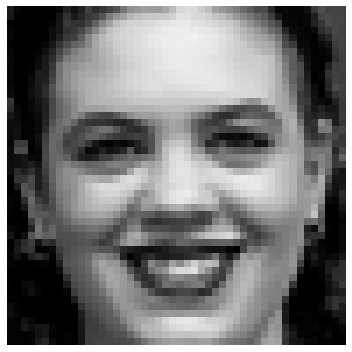

happiness


In [ ]:
plotImages(img_data[600])
print(label_text[labels[600]])

In [ ]:
def create_model(optim):
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)

    return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2,
                        zoom_range=0.2, horizontal_flip=True,
                        fill_mode='nearrest')

In [ ]:
from tensorflow.keras.optimizers import *

In [ ]:
x,y = shuffle(img_data,Y,random_state = 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

In [ ]:
Y = utils.to_categorical(labels, len(dataset)-1)
print(len(Y))
Y

981


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
len(img_data)

981

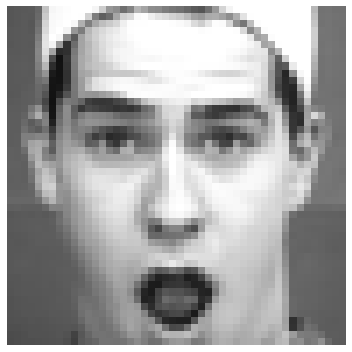

[0. 0. 0. 0. 0. 0. 1.]


In [ ]:
plotImages(x[0])
print(y[0])

In [ ]:
# from sklearn.model_selection import KFold

In [ ]:
# kf = KFold(n_splits=5, shuffle=False)

In [ ]:
aug.fit(X_train)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 100
optims = [
    Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    Adam(0.001),
]


model = create_model(optims[1])




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0

In [ ]:
model.fit(x=X_train, y= y_train, validation_split=0.1, batch_size=32,
          epochs=100, shuffle=True, verbose=2, callbacks=callbacks
         )

Epoch 1/100
23/23 - 1s - loss: 1.8314 - accuracy: 0.2567 - val_loss: 1.7486 - val_accuracy: 0.2532
Epoch 2/100
23/23 - 1s - loss: 1.7708 - accuracy: 0.3121 - val_loss: 1.6767 - val_accuracy: 0.3165
Epoch 3/100
23/23 - 1s - loss: 1.6179 - accuracy: 0.4043 - val_loss: 1.4187 - val_accuracy: 0.4557
Epoch 4/100
23/23 - 1s - loss: 1.3359 - accuracy: 0.5092 - val_loss: 1.1353 - val_accuracy: 0.5823
Epoch 5/100
23/23 - 1s - loss: 1.1482 - accuracy: 0.5589 - val_loss: 0.9913 - val_accuracy: 0.6329
Epoch 6/100
23/23 - 1s - loss: 0.9731 - accuracy: 0.6369 - val_loss: 0.8014 - val_accuracy: 0.7722
Epoch 7/100
23/23 - 1s - loss: 0.8787 - accuracy: 0.6723 - val_loss: 0.7090 - val_accuracy: 0.7848
Epoch 8/100
23/23 - 1s - loss: 0.8417 - accuracy: 0.6950 - val_loss: 0.6416 - val_accuracy: 0.7342
Epoch 9/100
23/23 - 1s - loss: 0.6714 - accuracy: 0.7433 - val_loss: 0.5970 - val_accuracy: 0.8228
Epoch 10/100
23/23 - 1s - loss: 0.6323 - accuracy: 0.7702 - val_loss: 0.5719 - val_accuracy: 0.8861
Epoch 11/

In [ ]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
label_mapdisgust = ['anger','contempt','disgust','fear','happy','sadness','surprise']

In [ ]:
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

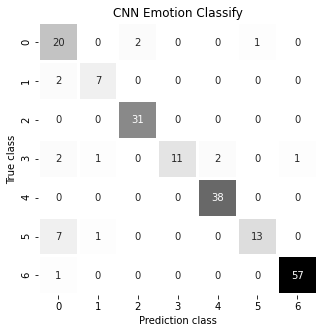

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[3:4]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[3:4])

#predict
y_pred = model.predict(X_test)

Test Loss: 0.30213403701782227
Test accuracy: 0.8984771370887756
(1, 48, 48, 3)
[[8.39535713e-01 7.76557578e-03 1.24645315e-01 1.83928394e-04
  2.53597368e-03 2.52125170e-02 1.21115154e-04]]
[0]
[[1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
 from sklearn.metrics import multilabel_confusion_matrix


In [ ]:
y_pred = (y_pred>0.5)
multilabel_confusion_matrix(y_test, y_pred )

array([[[168,   6],
        [  3,  20]],

       [[188,   0],
        [  6,   3]],

       [[165,   1],
        [  0,  31]],

       [[180,   0],
        [  8,   9]],

       [[158,   1],
        [  0,  38]],

       [[176,   0],
        [ 11,  10]],

       [[139,   0],
        [  1,  57]]], dtype=int64)

In [ ]:
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))

number of images in anger =  135
number of images in contempt =  54
number of images in disgust =  177
number of images in fear =  75
number of images in happy =  207
number of images in sadness =  84
number of images in surprise =  249


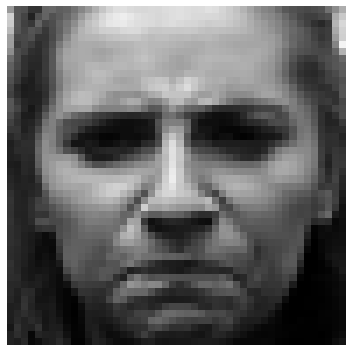

anger


In [ ]:
plotImages(X_test[3])
ans = int(model.predict_classes(test_image)[0])
print(label_text[ans])

In [ ]:
if os.path.isfile('model.h5') is False:
    model.save('model.h5')

(1, 48, 48, 3)


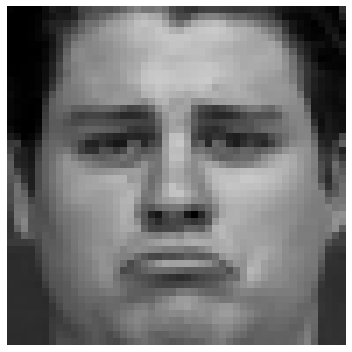

In [ ]:
test_img = X_test[1:2]
print(test_img.shape)
plotImages(X_test[1])

In [ ]:
model.predict_classes(test_img)

array([5], dtype=int64)

In [ ]:
y_test[1:2]

array([[0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
xx = []
xx

[]

In [ ]:
import imageio

In [ ]:
pic = imageio.imread('ex7.jpeg')

In [ ]:
pic.shape

(184, 273, 3)

In [ ]:
pic = cv2.resize(pic,(48,48))

In [ ]:
xx.append(pic)

In [ ]:
xx = np.array(xx)
xx = xx.astype('float32')
xx = xx/255

In [ ]:
xx.shape

(1, 48, 48, 3)

In [ ]:
model.predict_classes(xx)[0]

0

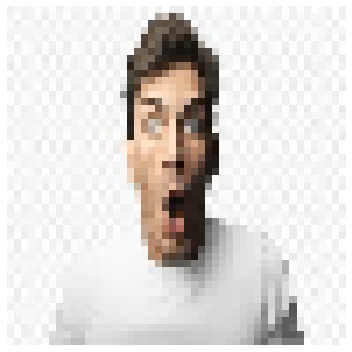

In [ ]:
plotImages(pic)

In [ ]:
data_dir_list

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MalwareDetectionSystem:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()

    def preprocess_binary_data(self, binary_data, max_length=1000):
        """
        Convert binary file to numerical representation

        Args:
            binary_data (bytes): Raw binary file content
            max_length (int): Maximum sequence length

        Returns:
            np.array: Preprocessed numerical representation
        """
        # Convert bytes to numerical sequence
        byte_sequence = list(binary_data[:max_length])

        # Pad or truncate to fixed length
        if len(byte_sequence) < max_length:
            byte_sequence += [0] * (max_length - len(byte_sequence))
        else:
            byte_sequence = byte_sequence[:max_length]

        return np.array(byte_sequence).reshape(-1, 1)

    def build_cnn_model(self, input_shape):
        """
        Create Convolutional Neural Network for malware detection

        Args:
            input_shape (tuple): Shape of input data

        Returns:
            tf.keras.Model: Compiled neural network model
        """
        model = Sequential([
            # 1D Convolutional layers for feature extraction
            Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
            MaxPooling1D(pool_size=2),

            Conv1D(128, kernel_size=3, activation='relu'),
            MaxPooling1D(pool_size=2),

            # Flatten and add dense layers
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.5),

            # Binary classification output
            Dense(1, activation='sigmoid')
        ])

        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        return model

    def train_malware_detection_model(self, malware_samples, benign_samples):
        """
        Train neural network on malware and benign samples

        Args:
            malware_samples (list): List of malware binary files
            benign_samples (list): List of benign binary files
        """
        # Prepare dataset
        X_malware = np.array([
            self.preprocess_binary_data(sample)
            for sample in malware_samples
        ])
        X_benign = np.array([
            self.preprocess_binary_data(sample)
            for sample in benign_samples
        ])

        # Create labels
        y_malware = np.ones(len(X_malware))
        y_benign = np.zeros(len(X_benign))

        # Combine datasets
        X = np.concatenate([X_malware, X_benign])
        y = np.concatenate([y_malware, y_benign])

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1]))
        X_test_scaled = self.scaler.transform(X_test.reshape(-1, X_test.shape[-1]))

        # Reshape for CNN
        X_train_scaled = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test_scaled = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], 1)

        # Build and train model
        self.model = self.build_cnn_model(input_shape=(X_train.shape[1], 1))

        # Training
        history = self.model.fit(
            X_train_scaled, y_train,
            epochs=10,
            batch_size=32,
            validation_split=0.2,
            verbose=1
        )

        # Evaluate model
        test_loss, test_accuracy = self.model.evaluate(
            X_test_scaled, y_test, verbose=0
        )
        print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

        return history

    def detect_malware(self, binary_file):
        """
        Predict if a binary file is malicious

        Args:
            binary_file (bytes): Binary file content

        Returns:
            float: Probability of being malware
        """
        if self.model is None:
            raise ValueError("Model not trained. Train the model first.")

        # Preprocess input
        preprocessed_data = self.preprocess_binary_data(binary_file)
        scaled_data = self.scaler.transform(preprocessed_data)
        scaled_data = scaled_data.reshape(1, scaled_data.shape[0], 1)

        # Predict
        prediction = self.model.predict(scaled_data)[0][0]
        return prediction

# Example Usage
def main():
    # Simulated binary data (replace with actual file reading)
    malware_samples = [b'\x01\x02\x03', b'\x04\x05\x06']
    benign_samples = [b'\x07\x08\x09', b'\x10\x11\x12']

    # Create and train malware detection system
    malware_detector = MalwareDetectionSystem()
    malware_detector.train_malware_detection_model(
        malware_samples,
        benign_samples
    )

    # Test detection on a sample file
    test_file = b'\x01\x02\x03'
    malware_probability = malware_detector.detect_malware(test_file)
    print(f"Malware Probability: {malware_probability * 100:.2f}%")

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.7520 - val_accuracy: 1.0000 - val_loss: 0.5797
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6265 - val_accuracy: 1.0000 - val_loss: 0.5362
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.5000 - loss: 0.5631 - val_accuracy: 1.0000 - val_loss: 0.4922
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.5000 - loss: 0.5967 - val_accuracy: 1.0000 - val_loss: 0.4416
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.5000 - loss: 0.5883 - val_accuracy: 1.0000 - val_loss: 0.3799
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5000 - loss: 0.4243 - val_accuracy: 1.0000 - val_loss: 0.3442
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.5000 - loss: 0.4422 - val_accuracy: 1.0000 - val_loss: 0.3423
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.5000 - loss: 0.3874 - val_accuracy: 1.0000 - val_loss: 0.382

ERROR: Could not find a version that satisfies the requirement python-magic-bin (from versions: none)
ERROR: No matching distribution found for python-magic-bin


ModuleNotFoundError: No module named 'magic'

In [ ]:
!pip install zxcvbn
import re
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import streamlit as st
import zxcvbn
import math

class PasswordStrengthAnalyzer:
    def __init__(self):
        self.model = self.build_neural_network()

    def build_neural_network(self):
        """
        Create neural network for password strength analysis
        """
        model = Sequential([
            # Input layer with password features
            Dense(64, activation='relu', input_shape=(7,)),
            Dropout(0.2),

            # Hidden layers
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(16, activation='relu'),

            # Output layer
            Dense(1, activation='sigmoid')
        ])

        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        return model

    def extract_password_features(self, password):
        """
        Extract comprehensive password features

        Features:
        1. Length
        2. Uppercase count
        3. Lowercase count
        4. Number count
        5. Special character count
        6. Entropy
        7. Complexity score
        """
        features = [
            len(password),  # Length
            sum(1 for c in password if c.isupper()),  # Uppercase count
            sum(1 for c in password if c.islower()),  # Lowercase count
            sum(1 for c in password if c.isdigit()),  # Number count
            sum(1 for c in password if not c.isalnum()),  # Special char count
            self.calculate_entropy(password),  # Entropy
            self.calculate_complexity_score(password)  # Complexity score
        ]

        return np.array(features).reshape(1, -1)

    def calculate_entropy(self, password):
        """
        Calculate password entropy
        """
        # Count character frequencies
        char_freq = {}
        for char in password:
            char_freq[char] = char_freq.get(char, 0) + 1

        # Calculate entropy
        entropy = 0
        for freq in char_freq.values():
            prob = freq / len(password)
            entropy -= prob * math.log2(prob)

        return entropy

    def calculate_complexity_score(self, password):
        """
        Calculate password complexity using multiple criteria
        """
        # Use zxcvbn for comprehensive strength analysis
        result = zxcvbn.zxcvbn(password)
        return result['score']

    def analyze_password_strength(self, password):
        """
        Comprehensive password strength analysis
        """
        # Extract features
        features = self.extract_password_features(password)

        # Use zxcvbn for detailed analysis
        zxcvbn_result = zxcvbn.zxcvbn(password)

        # Predict strength using neural network
        strength_prediction = self.model.predict(features)[0][0]

        # Prepare detailed analysis
        analysis = {
            "length": len(password),
            "entropy": self.calculate_entropy(password),
            "complexity_score": self.calculate_complexity_score(password),
            "neural_strength_score": float(strength_prediction),
            "zxcvbn_score": zxcvbn_result['score'],
            "zxcvbn_feedback": zxcvbn_result['feedback']
        }

        return analysis

    def generate_password_recommendations(self, analysis):
        """
        Generate password improvement recommendations
        """
        recommendations = []

        # Length recommendations
        if analysis['length'] < 8:
            recommendations.append("Password is too short. Aim for at least 12 characters.")

        # Complexity recommendations
        if analysis['complexity_score'] < 3:
            recommendations.append("Increase password complexity by adding:")
            recommendations.append("- Uppercase letters")
            recommendations.append("- Lowercase letters")
            recommendations.append("- Numbers")
            recommendations.append("- Special characters")

        # Entropy recommendations
        if analysis['entropy'] < 3:
            recommendations.append("Low character diversity. Use a mix of different character types.")

        return recommendations

def main():
    st.title("🔐 Advanced Password Strength Analyzer")

    # Sidebar for additional information
    st.sidebar.header("Password Security Tips")
    st.sidebar.info("""
    🛡️ Strong Password Guidelines:
    - Minimum 12 characters
    - Mix of uppercase and lowercase
    - Include numbers and symbols
    - Avoid common words or patterns
    - Use unique passwords for each account
    """)

    # Password input
    password = st.text_input("Enter Password", type="password")

    if password:
        # Create analyzer
        analyzer = PasswordStrengthAnalyzer()

        # Analyze password
        analysis = analyzer.analyze_password_strength(password)

        # Generate recommendations
        recommendations = analyzer.generate_password_recommendations(analysis)

        # Results display
        st.subheader("Password Analysis Results")

        # Strength Visualization
        strength_color = {
            0: "red",
            1: "orange",
            2: "yellow",
            3: "green",
            4: "green"
        }

        st.markdown(f"""
        ### Strength Assessment
        **Complexity Score:**
        <span style='color:{strength_color.get(analysis["zxcvbn_score"], "black")}'>
        {"★" * (analysis["zxcvbn_score"] + 1)}
        ({["Very Weak", "Weak", "Medium", "Strong", "Very Strong"][analysis["zxcvbn_score"]]})
        </span>
        """, unsafe_allow_html=True)

        # Detailed Metrics
        col1, col2, col3 = st.columns(3)

        with col1:
            st.metric("Password Length", analysis['length'])

        with col2:
            st.metric("Entropy", f"{analysis['entropy']:.2f}")

        with col3:
            st.metric("Neural Strength", f"{analysis['neural_strength_score']:.2%}")

        # Recommendations
        if recommendations:
            st.subheader("🚀 Improvement Recommendations")
            for rec in recommendations:
                st.warning(rec)

        # Additional Security Insights
        st.subheader("Security Insights")
        if analysis['zxcvbn_feedback']['suggestions']:
            st.info("Suggestions: " +
                    ". ".join(analysis['zxcvbn_feedback']['suggestions']))

        if analysis['zxcvbn_feedback']['warning']:
            st.warning("Warning: " + analysis['zxcvbn_feedback']['warning'])

if __name__ == "__main__":
    main()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.9/407.9 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for zxcvbn: filename=zxcvbn-4.4.28-py2.py3-none-any.whl size=408125 sha256=81479df8d2421162d8ecb2bf3659de638447e531d0ceccd47cd3a6d56a11da1e
  Stored in directory: /root/.cache/pip/wheels/ef/89/c6/a0e065af99073821bb4b83f6ec0561e981fc00498fe8e9c45d
Successfully built zxcvbn


2024-12-04 10:53:25.421 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 10:53:25.563 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-04 10:53:25.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 10:53:25.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 10:53:25.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 10:53:25.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 10:53:25.580 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 10:53:25.582 Thread 'MainThread': mi

In [ ]:
!pip install dash
import re
import numpy as np
import math
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import zxcvbn

# Initialize Dash App
app = dash.Dash(__name__)

class PasswordStrengthAnalyzer:
    def __init__(self):
        self.model = self.build_neural_network()

    def build_neural_network(self):
        """
        Create neural network for password strength analysis
        """
        model = Sequential([
            # Input layer with password features
            Dense(64, activation='relu', input_shape=(7,)),
            Dropout(0.2),

            # Hidden layers
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(16, activation='relu'),

            # Output layer
            Dense(1, activation='sigmoid')
        ])

        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        return model

    def extract_password_features(self, password):
        """
        Extract comprehensive password features
        Features:
        1. Length
        2. Uppercase count
        3. Lowercase count
        4. Number count
        5. Special character count
        6. Entropy
        7. Complexity score
        """
        features = [
            len(password),  # Length
            sum(1 for c in password if c.isupper()),  # Uppercase count
            sum(1 for c in password if c.islower()),  # Lowercase count
            sum(1 for c in password if c.isdigit()),  # Number count
            sum(1 for c in password if not c.isalnum()),  # Special char count
            self.calculate_entropy(password),  # Entropy
            self.calculate_complexity_score(password)  # Complexity score
        ]

        return np.array(features).reshape(1, -1)

    def calculate_entropy(self, password):
        """
        Calculate password entropy
        """
        # Count character frequencies
        char_freq = {}
        for char in password:
            char_freq[char] = char_freq.get(char, 0) + 1

        # Calculate entropy
        entropy = 0
        for freq in char_freq.values():
            prob = freq / len(password)
            entropy -= prob * math.log2(prob)

        return entropy

    def calculate_complexity_score(self, password):
        """
        Calculate password complexity using multiple criteria
        """
        # Use zxcvbn for comprehensive strength analysis
        result = zxcvbn.zxcvbn(password)
        return result['score']

    def analyze_password_strength(self, password):
        """
        Comprehensive password strength analysis
        """
        # Extract features
        features = self.extract_password_features(password)

        # Use zxcvbn for detailed analysis
        zxcvbn_result = zxcvbn.zxcvbn(password)

        # Predict strength using neural network
        strength_prediction = self.model.predict(features)[0][0]

        # Prepare detailed analysis
        analysis = {
            "length": len(password),
            "entropy": self.calculate_entropy(password),
            "complexity_score": self.calculate_complexity_score(password),
            "neural_strength_score": float(strength_prediction),
            "zxcvbn_score": zxcvbn_result['score'],
            "zxcvbn_feedback": zxcvbn_result['feedback']
        }

        return analysis

    def generate_password_recommendations(self, analysis):
        """
        Generate password improvement recommendations
        """
        recommendations = []

        # Length recommendations
        if analysis['length'] < 8:
            recommendations.append("Password is too short. Aim for at least 12 characters.")

        # Complexity recommendations
        if analysis['complexity_score'] < 3:
            recommendations.append("Increase password complexity by adding:")
            recommendations.append("- Uppercase letters")
            recommendations.append("- Lowercase letters")
            recommendations.append("- Numbers")
            recommendations.append("- Special characters")

        # Entropy recommendations
        if analysis['entropy'] < 3:
            recommendations.append("Low character diversity. Use a mix of different character types.")

        return recommendations

# Dash layout
app.layout = html.Div([
    html.H1("🔐 Advanced Password Strength Analyzer"),
    html.Div([
        html.Label("Enter Password:"),
        dcc.Input(id="password-input", type="password", debounce=True, style={'width': '80%'})
    ], style={'padding': '10px'}),

    html.Div(id="analysis-results"),
    html.Div(id="recommendations"),
    html.Div(id="security-insights")
])

@app.callback(
    [Output("analysis-results", "children"),
     Output("recommendations", "children"),
     Output("security-insights", "children")],
    [Input("password-input", "value")]
)
def update_password_analysis(password):
    if password:
        analyzer = PasswordStrengthAnalyzer()
        analysis = analyzer.analyze_password_strength(password)
        recommendations = analyzer.generate_password_recommendations(analysis)

        # Results display
        strength_color = {
            0: "red",
            1: "orange",
            2: "yellow",
            3: "green",
            4: "green"
        }

        strength_assessment = html.Div([
            html.H4("Password Strength: "),
            html.P(f"Complexity Score: {analysis['zxcvbn_score']}"),
            html.Div([
                html.Div(f"Length: {analysis['length']}", style={'width': '33%', 'display': 'inline-block'}),
                html.Div(f"Entropy: {analysis['entropy']:.2f}", style={'width': '33%', 'display': 'inline-block'}),
                html.Div(f"Neural Strength: {analysis['neural_strength_score']:.2%}", style={'width': '33%', 'display': 'inline-block'}),
            ], style={'padding': '10px'}),
            html.Div([
                html.P(f"Password Strength: {['Very Weak', 'Weak', 'Medium', 'Strong', 'Very Strong'][analysis['zxcvbn_score']]}",
                    style={'color': strength_color.get(analysis["zxcvbn_score"], "black")})
            ])
        ])

        # Recommendations
        recommendations_output = html.Div()
        if recommendations:
            recommendations_output = html.Div([
                html.H4("🚀 Improvement Recommendations"),
                html.Ul([html.Li(rec) for rec in recommendations])
            ])

        # Security Insights
        security_insights_output = html.Div()
        if analysis['zxcvbn_feedback']['suggestions']:
            security_insights_output = html.Div([
                html.H4("Security Insights:"),
                html.P("Suggestions: " + ". ".join(analysis['zxcvbn_feedback']['suggestions']))
            ])

        if analysis['zxcvbn_feedback']['warning']:
            security_insights_output = html.Div([
                html.H4("Security Insights:"),
                html.P("Warning: " + analysis['zxcvbn_feedback']['warning'], style={'color': 'red'})
            ])

        return strength_assessment, recommendations_output, security_insights_output

    return "", "", ""

if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import cv2
from tensorflow import keras
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Nadam, Adam
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import seaborn as sns
import imageio

# Data loading and preprocessing
img_data = []
img = cv2.imread('/content/happy.jpg')  # Path to the uploaded image in Google Colab's files section
img = cv2.resize(img, (48, 48))
img_data.append(img)

img_data = np.array(img_data).astype('float32') / 255
labels = np.array([4])  # Label corresponding to 'happiness'

label_text = {0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happiness', 5: 'sadness', 6: 'surprise'}

def plotImages(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Model creation
def create_model(optim):
    input_shape = (48, 48, 3)
    model = Sequential([
        Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, (5, 5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optim)
    return model

# Data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2,
                         zoom_range=0.2, horizontal_flip=True,
                         fill_mode='nearest')

# Data loading and preprocessing
# ... (Existing code) ...

# Data preparation
labels_categorical = keras.utils.to_categorical(labels, num_classes=7)
x, y = shuffle(img_data, labels_categorical, random_state=3)

# Instead of splitting with train_test_split, use the whole data for training
X_train, y_train = x, y
X_test, y_test = x, y  # or use a separate test set if available

# Training setup
early_stopping = EarlyStopping(monitor='val_accuracy', patience=11, verbose=1, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=7, min_lr=1e-7, verbose=1)
callbacks = [early_stopping, lr_scheduler]

model = create_model(Adam(learning_rate=0.001))
model.summary()

# Training

# Evaluation
results = model.predict(X_test)model.fit(x=X_train, y=y_train, validation_split=0.0, # Change to 0.0 or Remove validation_split
          batch_size=32, epochs=100, shuffle=True, verbose=2, callbacks=callbacks)
y_pred = np.argmax(results, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='Greys', cbar=False, fmt='d', xticklabels=label_text.values(), yticklabels=label_text.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save model
if not os.path.isfile('model.h5'):
    model.save('model.h5')

# Testing
test_img = X_test[0:1]  # Update to test the single image
plotImages(X_test[0])
print(f"Predicted: {label_text[np.argmax(model.predict(test_img)[0])]}, Actual: {label_text[np.argmax(y_test[0])]}")

SyntaxError: invalid syntax (<ipython-input-28-307ee3139bd8>, line 81)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 48, 48, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 24, 24, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 10, 10, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,983 (851.50 KB)

 Trainable params: 217,983 (851.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 1.7347 - learning_rate: 0.0010
Epoch 2/100
1/1 - 0s - 39ms/step - accuracy: 1.0000 - loss: 1.6962 - learning_rate: 0.0010
Epoch 3/100
1/1 - 0s - 37ms/step - accuracy: 1.0000 - loss: 1.1010 - learning_rate: 0.0010
Epoch 4/100
1/1 - 0s - 52ms/step - accuracy: 1.0000 - loss: 0.6079 - learning_rate: 0.0010
Epoch 5/100
1/1 - 0s - 32ms/step - accuracy: 1.0000 - loss: 0.3937 - learning_rate: 0.0010
Epoch 6/100


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning:

Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning:

Learning rate reduction is conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss,learning_rate.



1/1 - 0s - 59ms/step - accuracy: 1.0000 - loss: 0.0719 - learning_rate: 0.0010
Epoch 7/100
1/1 - 0s - 33ms/step - accuracy: 1.0000 - loss: 0.0104 - learning_rate: 0.0010
Epoch 8/100
1/1 - 0s - 33ms/step - accuracy: 1.0000 - loss: 0.1117 - learning_rate: 0.0010
Epoch 9/100
1/1 - 0s - 57ms/step - accuracy: 1.0000 - loss: 0.0034 - learning_rate: 0.0010
Epoch 10/100
1/1 - 0s - 32ms/step - accuracy: 1.0000 - loss: 2.7299e-05 - learning_rate: 0.0010
Epoch 11/100
1/1 - 0s - 33ms/step - accuracy: 1.0000 - loss: 6.0797e-06 - learning_rate: 0.0010
Epoch 12/100
1/1 - 0s - 34ms/step - accuracy: 1.0000 - loss: 9.1791e-06 - learning_rate: 0.0010
Epoch 13/100
1/1 - 0s - 36ms/step - accuracy: 1.0000 - loss: 1.0610e-05 - learning_rate: 0.0010
Epoch 14/100
1/1 - 0s - 34ms/step - accuracy: 1.0000 - loss: 1.4305e-06 - learning_rate: 0.0010
Epoch 15/100
1/1 - 0s - 59ms/step - accuracy: 1.0000 - loss: 1.0729e-06 - learning_rate: 0.0010
Epoch 16/100
1/1 - 0s - 55ms/step - accuracy: 1.0000 - loss: 0.0000e+00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



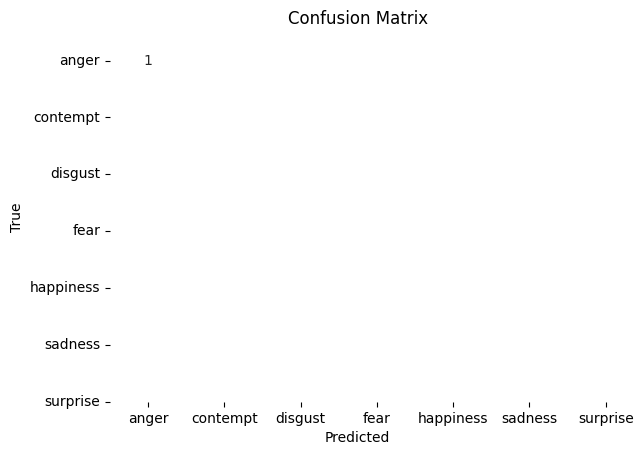

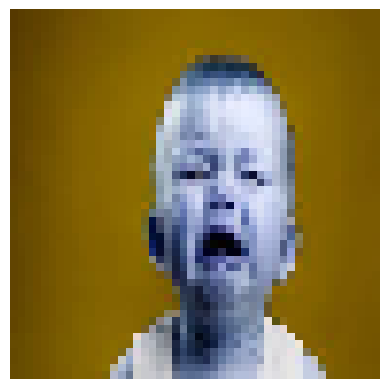

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted: happiness, Actual: happiness


In [ ]:
import pandas as pd
import numpy as np
import cv2
from tensorflow import keras
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Nadam, Adam
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import seaborn as sns
import imageio

# Data loading and preprocessing
img_data = []
img = cv2.imread('/content/sad pic.jpg')  # Path to the uploaded image in Google Colab's files section
img = cv2.resize(img, (48, 48))
img_data.append(img)

img_data = np.array(img_data).astype('float32') / 255
labels = np.array([4])  # Label corresponding to 'happiness'

label_text = {0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happiness', 5: 'sadness', 6: 'surprise'}

def plotImages(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Model creation
def create_model(optim):
    input_shape = (48, 48, 3)
    model = Sequential([
        Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, (5, 5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optim)
    return model

# Data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2,
                         zoom_range=0.2, horizontal_flip=True,
                         fill_mode='nearest')

# Data preparation
labels_categorical = keras.utils.to_categorical(labels, num_classes=7)
img_data, labels_categorical = shuffle(img_data, labels_categorical, random_state=3)
X_train, X_test, y_train, y_test = img_data, img_data, labels_categorical, labels_categorical

# Training setup
early_stopping = EarlyStopping(monitor='val_accuracy', patience=11, verbose=1, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=7, min_lr=1e-7, verbose=1)
callbacks = [early_stopping, lr_scheduler]

model = create_model(Adam(learning_rate=0.001))
model.summary()

# Training
model.fit(x=X_train, y=y_train, validation_split=0.0, batch_size=32, epochs=100, shuffle=True, verbose=2, callbacks=callbacks)

# Evaluation
results = model.predict(X_test)
y_pred = np.argmax(results, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='Greys', cbar=False, fmt='d', xticklabels=label_text.values(), yticklabels=label_text.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save model
if not os.path.isfile('model.h5'):
    model.save('model.h5')

# Testing
test_img = X_test[0:1]  # Update to test the single image
plotImages(X_test[0])
print(f"Predicted: {label_text[np.argmax(model.predict(test_img)[0])]}, Actual: {label_text[np.argmax(y_test[0])]}")


In [ ]:
import pygame
import random
import numpy as np
import math

# Initialize pygame
pygame.init()

# Set up the display
WIDTH, HEIGHT = 600, 600
GRID_SIZE = 20
window = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Smarter Genetic Snake Game")

# Colors
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLACK = (0, 0, 0)
# Load images for snake and food
snake_image = pygame.image.load('snake.jpg')  # Ensure the path is correct
apple_image = pygame.image.load('apple.jpg')  # Ensure the path is correct

# Resize images to match the grid size
snake_image = pygame.transform.scale(snake_image, (GRID_SIZE, GRID_SIZE))
apple_image = pygame.transform.scale(apple_image, (GRID_SIZE, GRID_SIZE))

# Clock for controlling the frame rate
clock = pygame.time.Clock()

# Directions
UP = (-GRID_SIZE, 0)
DOWN = (GRID_SIZE, 0)
LEFT = (0, -GRID_SIZE)
RIGHT = (0, GRID_SIZE)
ACTIONS = [UP, DOWN, LEFT, RIGHT]

# Population and Genetic Parameters
POPULATION_SIZE = 10
MUTATION_RATE = 0.05
CROSSOVER_RATE = 0.7
GENERATION_COUNT = 10
TIME_LIMIT = 10  # Steps per snake before it dies if it doesn't find food

# Initialize the genetic algorithm
class Snake:
    def __init__(self):
        self.snake = [(WIDTH // 2, HEIGHT // 2)]
        self.snake_direction = RIGHT
        self.fitness = 0
        # Chromosome contains directions for each cell in a grid. The snake decides based on the grid cells
        self.chromosome = np.random.random((WIDTH // GRID_SIZE, HEIGHT // GRID_SIZE, 4))  # Probability map for each direction
        self.time_alive = 0
        self.food_eaten = 0
        self.max_fitness = 0

    def reset(self):
        self.snake = [(WIDTH // 2, HEIGHT // 2)]
        self.snake_direction = RIGHT
        self.fitness = 0
        self.time_alive = 0
        self.food_eaten = 0

    def move(self, food_pos):
        # Calculate distance from head to food
        snake_head = self.snake[0]
        direction = self.calculate_best_direction(snake_head, food_pos)

        # Move the snake based on the calculated direction
        self.snake_direction = direction
        new_head = (self.snake[0][0] + self.snake_direction[0], self.snake[0][1] + self.snake_direction[1])
        self.snake = [new_head] + self.snake[:-1]  # Add new head, remove the last part

    def calculate_best_direction(self, snake_head, food_pos):
        """Calculate the best direction towards food using the chromosome."""
        x, y = snake_head
        fx, fy = food_pos
        # Determine relative direction to the food
        direction_to_food = np.array([fx - x, fy - y])
        directions = np.array([UP, DOWN, LEFT, RIGHT])

        # Calculate the direction with the shortest distance to food
        best_dir = None
        min_distance = float('inf')
        for i, dir in enumerate(directions):
            new_head = (x + dir[0], y + dir[1])
            distance = np.linalg.norm(np.array([new_head[0] - fx, new_head[1] - fy]))
            if distance < min_distance:
                best_dir = dir
                min_distance = distance

        return best_dir

    def check_collisions(self):
        # Check for collision with wall or self
        snake_head = self.snake[0]
        if snake_head[0] < 0 or snake_head[0] >= WIDTH or snake_head[1] < 0 or snake_head[1] >= HEIGHT:
            return True  # Collision with wall
        if len(self.snake) != len(set(self.snake)):
            return True  # Collision with self
        return False

    def evaluate_fitness(self):
        # Fitness is based on food eaten and survival time
        self.fitness = self.food_eaten + self.time_alive // 50  # Reward longer survival time and food eaten

# Crossover function to combine two snakes' chromosomes
def crossover(snake1, snake2):
    if random.random() < CROSSOVER_RATE:
        crossover_point = random.randint(0, len(snake1.chromosome) - 1)
        # Swap parts of the chromosome between two snakes
        child1_chromosome = np.copy(snake1.chromosome)
        child2_chromosome = np.copy(snake2.chromosome)

        child1_chromosome[crossover_point:] = snake2.chromosome[crossover_point:]
        child2_chromosome[crossover_point:] = snake1.chromosome[crossover_point:]

        # Return the new snakes
        child1 = Snake()
        child2 = Snake()
        child1.chromosome = child1_chromosome
        child2.chromosome = child2_chromosome
        return child1, child2
    return snake1, snake2

# Mutation function to randomly alter a snake's chromosome
def mutate(snake):
    for i in range(len(snake.chromosome)):
        if random.random() < MUTATION_RATE:
            mutation_point = random.randint(0, len(snake.chromosome[i]) - 1)
            snake.chromosome[i][mutation_point] = np.random.random(4)  # Random probability for each direction

# Draw all snakes on the screen
def draw_snakes(population):
    for snake in population:
        for segment in snake.snake:
            pygame.draw.rect(window, GREEN, pygame.Rect(segment[0], segment[1], GRID_SIZE, GRID_SIZE))

# Draw the food on the screen
def draw_food(food_pos):
    pygame.draw.rect(window, RED, pygame.Rect(food_pos[0], food_pos[1], GRID_SIZE, GRID_SIZE))

# Main game loop
def game_loop():
    population = [Snake() for _ in range(POPULATION_SIZE)]
    generation = 0
    best_snake = None

    while generation < GENERATION_COUNT:
        print(f"Generation {generation + 1}")

        # Run each snake for a certain number of steps
        for snake in population:
            snake.reset()
            food_pos = (random.randint(0, (WIDTH - GRID_SIZE) // GRID_SIZE) * GRID_SIZE,
                        random.randint(0, (HEIGHT - GRID_SIZE) // GRID_SIZE) * GRID_SIZE)
            running = True

            # Run the snake through a game loop for a certain number of steps
            for _ in range(TIME_LIMIT):  # Limit steps per snake to avoid infinite loops
                snake.move(food_pos)
                if snake.snake[0] == food_pos:
                    snake.food_eaten += 1  # Increase food count for eating food
                    food_pos = (random.randint(0, (WIDTH - GRID_SIZE) // GRID_SIZE) * GRID_SIZE,
                                random.randint(0, (HEIGHT - GRID_SIZE) // GRID_SIZE) * GRID_SIZE)
                if snake.check_collisions():
                    break  # Snake dies, end game
                snake.time_alive += 1  # Increment time alive

                # Visualize each move of the snake
                window.fill(BLACK)
                draw_snakes(population)
                draw_food(food_pos)
                pygame.display.update()
                clock.tick(10)

            # Evaluate the snake's fitness
            snake.evaluate_fitness()

            if best_snake is None or snake.fitness > best_snake.fitness:
                best_snake = snake

        # Select the top half of the population to form the next generation
        population = sorted(population, key=lambda x: x.fitness, reverse=True)
        new_population = population[:POPULATION_SIZE // 2]  # Keep top half

        # Apply crossover and mutation to generate the rest of the population
        while len(new_population) < POPULATION_SIZE:
            parent1 = random.choice(population[:POPULATION_SIZE // 2])
            parent2 = random.choice(population[:POPULATION_SIZE // 2])
            child1, child2 = crossover(parent1, parent2)
            mutate(child1)
            mutate(child2)
            new_population.extend([child1, child2])

        population = new_population
        generation += 1

        # After each generation, pause to visualize the evolution
        print(f"Generation {generation} completed with Best Fitness: {best_snake.fitness}")
        pygame.time.wait(1000)  # Pause for 1 second before starting next generation

    print(f"Best Snake Fitness: {best_snake.fitness}")
    pygame.quit()

# Start the game
game_loop()

Generation 1
Generation 1 completed with Best Fitness: 1
Generation 2
Generation 2 completed with Best Fitness: 1
Generation 3
Generation 3 completed with Best Fitness: 1
Generation 4
Generation 4 completed with Best Fitness: 2
Generation 5
Generation 5 completed with Best Fitness: 1
Generation 6
Generation 6 completed with Best Fitness: 2
Generation 7
Generation 7 completed with Best Fitness: 2
Generation 8
Generation 8 completed with Best Fitness: 1
Generation 9
Generation 9 completed with Best Fitness: 1
Generation 10
Generation 10 completed with Best Fitness: 1
Best Snake Fitness: 1


In [ ]:
import pygame
import random
import numpy as np
import math

# Initialize pygame
pygame.init()

# Set up the display
WIDTH, HEIGHT = 600, 600
GRID_SIZE = 20
window = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Smarter Genetic Snake Game")

# Colors
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLACK = (0, 0, 0)

# Load images for snake and food
snake_image = pygame.image.load('s.jpg')  # Ensure the path is correct
apple_image = pygame.image.load('a.jpg')  # Ensure the path is correct

# Resize images to match the grid size
snake_image = pygame.transform.scale(snake_image, (GRID_SIZE, GRID_SIZE))
apple_image = pygame.transform.scale(apple_image, (GRID_SIZE, GRID_SIZE))

# Clock for controlling the frame rate
clock = pygame.time.Clock()

# Directions
UP = (-GRID_SIZE, 0)
DOWN = (GRID_SIZE, 0)
LEFT = (0, -GRID_SIZE)
RIGHT = (0, GRID_SIZE)
ACTIONS = [UP, DOWN, LEFT, RIGHT]

# Population and Genetic Parameters
POPULATION_SIZE = 10
MUTATION_RATE = 0.05
CROSSOVER_RATE = 0.7
GENERATION_COUNT = 10
TIME_LIMIT = 10  # Steps per snake before it dies if it doesn't find food

# Initialize the genetic algorithm
class Snake:
    def __init__(self):
        self.snake = [(WIDTH // 2, HEIGHT // 2)]
        self.snake_direction = RIGHT
        self.fitness = 0
        # Chromosome contains directions for each cell in a grid. The snake decides based on the grid cells
        self.chromosome = np.random.random((WIDTH // GRID_SIZE, HEIGHT // GRID_SIZE, 4))  # Probability map for each direction
        self.time_alive = 0
        self.food_eaten = 0
        self.max_fitness = 0

    def reset(self):
        self.snake = [(WIDTH // 2, HEIGHT // 2)]
        self.snake_direction = RIGHT
        self.fitness = 0
        self.time_alive = 0
        self.food_eaten = 0

    def move(self, food_pos):
        # Calculate distance from head to food
        snake_head = self.snake[0]
        direction = self.calculate_best_direction(snake_head, food_pos)

        # Move the snake based on the calculated direction
        self.snake_direction = direction
        new_head = (self.snake[0][0] + self.snake_direction[0], self.snake[0][1] + self.snake_direction[1])
        self.snake = [new_head] + self.snake[:-1]  # Add new head, remove the last part

    def calculate_best_direction(self, snake_head, food_pos):
        """Calculate the best direction towards food using the chromosome."""
        x, y = snake_head
        fx, fy = food_pos
        # Determine relative direction to the food
        direction_to_food = np.array([fx - x, fy - y])
        directions = np.array([UP, DOWN, LEFT, RIGHT])

        # Calculate the direction with the shortest distance to food
        best_dir = None
        min_distance = float('inf')
        for i, dir in enumerate(directions):
            new_head = (x + dir[0], y + dir[1])
            distance = np.linalg.norm(np.array([new_head[0] - fx, new_head[1] - fy]))
            if distance < min_distance:
                best_dir = dir
                min_distance = distance

        return best_dir

    def check_collisions(self):
        # Check for collision with wall or self
        snake_head = self.snake[0]
        if snake_head[0] < 0 or snake_head[0] >= WIDTH or snake_head[1] < 0 or snake_head[1] >= HEIGHT:
            return True  # Collision with wall
        if len(self.snake) != len(set(self.snake)):
            return True  # Collision with self
        return False

    def evaluate_fitness(self):
        # Fitness is based on food eaten and survival time
        self.fitness = self.food_eaten + self.time_alive // 50  # Reward longer survival time and food eaten

# Crossover function to combine two snakes' chromosomes
def crossover(snake1, snake2):
    if random.random() < CROSSOVER_RATE:
        crossover_point = random.randint(0, len(snake1.chromosome) - 1)
        # Swap parts of the chromosome between two snakes
        child1_chromosome = np.copy(snake1.chromosome)
        child2_chromosome = np.copy(snake2.chromosome)

        child1_chromosome[crossover_point:] = snake2.chromosome[crossover_point:]
        child2_chromosome[crossover_point:] = snake1.chromosome[crossover_point:]

        # Return the new snakes
        child1 = Snake()
        child2 = Snake()
        child1.chromosome = child1_chromosome
        child2.chromosome = child2_chromosome
        return child1, child2
    return snake1, snake2

# Mutation function to randomly alter a snake's chromosome
def mutate(snake):
    for i in range(len(snake.chromosome)):
        if random.random() < MUTATION_RATE:
            # Replace the i-th direction probability with a new random value
            snake.chromosome[i] = np.random.random()

# Draw all snakes on the screen
def draw_snakes(population):
    for snake in population:
        for segment in snake.snake:
            window.blit(snake_image, segment)

def draw_food(food_pos):
    window.blit(apple_image, food_pos)

# Main game loop
def game_loop():
    population = [Snake() for _ in range(POPULATION_SIZE)]
    generation = 0
    best_snake = None

    while generation < GENERATION_COUNT:
        print(f"Generation {generation + 1}")

        # Run each snake for a certain number of steps
        for snake in population:
            snake.reset()
            food_pos = (random.randint(0, (WIDTH - GRID_SIZE) // GRID_SIZE) * GRID_SIZE,
                        random.randint(0, (HEIGHT - GRID_SIZE) // GRID_SIZE) * GRID_SIZE)
            running = True

            # Run the snake through a game loop for a certain number of steps
            for _ in range(TIME_LIMIT):  # Limit steps per snake to avoid infinite loops
                snake.move(food_pos)
                if snake.snake[0] == food_pos:
                    snake.food_eaten += 1  # Increase food count for eating food
                    food_pos = (random.randint(0, (WIDTH - GRID_SIZE) // GRID_SIZE) * GRID_SIZE,
                                random.randint(0, (HEIGHT - GRID_SIZE) // GRID_SIZE) * GRID_SIZE)
                if snake.check_collisions():
                    break  # Snake dies, end game
                snake.time_alive += 1  # Increment time alive

                # Visualize each move of the snake
                window.fill(BLACK)
                draw_snakes(population)
                draw_food(food_pos)
                pygame.display.update()
                clock.tick(10)

            # Evaluate the snake's fitness
            snake.evaluate_fitness()

            if best_snake is None or snake.fitness > best_snake.fitness:
                best_snake = snake

        # Select the top half of the population to form the next generation
        population = sorted(population, key=lambda x: x.fitness, reverse=True)
        new_population = population[:POPULATION_SIZE // 2]  # Keep top half

        # Apply crossover and mutation to generate the rest of the population
        while len(new_population) < POPULATION_SIZE:
            parent1 = random.choice(population[:POPULATION_SIZE // 2])
            parent2 = random.choice(population[:POPULATION_SIZE // 2])
            child1, child2 = crossover(parent1, parent2)
            mutate(child1)
            mutate(child2)
            new_population.extend([child1, child2])

        population = new_population
        generation += 1

        # After each generation, pause to visualize the evolution
        print(f"Generation {generation} completed with Best Fitness: {best_snake.fitness}")
        pygame.time.wait(1000)  # Pause for 1 second before starting next generation

    print(f"Best Snake Fitness: {best_snake.fitness}")
    pygame.quit()

# Start the game
game_loop()